Import libraries

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


In [2]:
def top_venues(num_top_venues,data):
    for hood in data['Neighbourhood']:
        print("----"+hood+"----")
        temp = data[data['Neighbourhood'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

In [3]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [4]:
# create a new dataframe
def venues_to_dataframe(num_top_venues,columns,data,col):
    indicators = ['st', 'nd', 'rd']
    
    # create columns according to number of top venues
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
    neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighbourhoods_venues_sorted[col] = data[col]   
    for ind in np.arange(data.shape[0]):
        neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data.iloc[ind, :], num_top_venues)
    return neighbourhoods_venues_sorted


In [5]:
def get_colors(n):
    return list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

In [6]:
neighbourhoods=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/neighbourhoods_london.csv',index_col=0)

In [7]:
neighbourhoods.shape

(563, 4)

Read borough_CLustering_05 csvfile

In [8]:

bc05=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/Borough_Cluster_05.csv',index_col=0)

In [9]:
for ii in bc05.columns:
    
        bc05[ii][0]=[x.strip() for x in eval(bc05[ii][0])]

In [10]:
London_neig_grouped=pd.read_csv('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/DATA/london_neig_grouped_CATEGORY_mean.csv', index_col=0)

In [11]:
London_neig_grouped.head()

,Neighbourhood,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,Abbey Wood,0.0,0.0,0.0,0.0,0.00,0.00,0.50,0.50,0.00
1,Acton,0.0,0.0,0.0,0.0,0.20,0.00,0.10,0.30,0.40
2,Addington,0.0,0.0,0.0,0.0,0.25,0.00,0.00,0.25,0.50
3,Addiscombe,0.0,0.0,0.0,0.0,0.50,0.00,0.25,0.25,0.00
4,Albany Park,0.0,0.0,0.0,0.0,0.25,0.25,0.00,0.25,0.25


In [12]:
bc051=pd.DataFrame(bc05['0'][0],columns=['Borough'])

In [13]:
pp=neighbourhoods.loc[neighbourhoods['Borough'].isin(bc051['Borough'].values)]['Neighbourhood']

In [14]:
London_neig_grouped_mean=London_neig_grouped.loc[London_neig_grouped['Neighbourhood'].isin(pp.values)]

Let's print each neighbourhood with the 10 most common venues

In [15]:
London_neig_grouped_mean.shape

(246, 10)

In [16]:
num_top_venues = 5
top_venues(num_top_venues,London_neig_grouped_mean)

----Abbey Wood----
                venue  freq
0      parks_outdoors   0.5
1               shops   0.5
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Albany Park----
                venue  freq
0                food  0.25
1           nightlife  0.25
2               shops  0.25
3              travel  0.25
4  arts_entertainment  0.00


----Aldborough Hatch----
                venue  freq
0                food   1.0
1  arts_entertainment   0.0
2            building   0.0
3           education   0.0
4               event   0.0


----Alperton----
                venue  freq
0                food  0.62
1               shops  0.25
2            building  0.12
3  arts_entertainment  0.00
4           education  0.00


----Anerley----
            venue  freq
0          travel  0.31
1  parks_outdoors  0.19
2           shops  0.19
3            food  0.12
4       nightlife  0.12


----Aperfield----
                venue  freq
0  arts_entertainment   0.5
1  

                venue  freq
0               shops  0.44
1                food  0.31
2              travel  0.12
3  arts_entertainment  0.06
4           nightlife  0.06


----Crews Hill----
                venue  freq
0      parks_outdoors  0.50
1  arts_entertainment  0.25
2               shops  0.25
3            building  0.00
4           education  0.00


----Cricklewood----
                venue  freq
0                food  0.59
1               shops  0.19
2              travel  0.15
3           nightlife  0.07
4  arts_entertainment  0.00


----Crofton Park----
                venue  freq
0                food  0.39
1               shops  0.22
2  arts_entertainment  0.11
3           nightlife  0.11
4              travel  0.11


----Crook Log----
                venue  freq
0                food  0.43
1            building  0.29
2  arts_entertainment  0.14
3           nightlife  0.14
4           education  0.00


----Crossness----
                venue  freq
0               shops  0.5

                venue  freq
0                food   0.5
1      parks_outdoors   0.5
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Hillingdon----
                venue  freq
0                food   0.6
1           nightlife   0.2
2               shops   0.2
3  arts_entertainment   0.0
4            building   0.0


----Hither Green----
            venue  freq
0            food  0.44
1          travel  0.26
2           shops  0.19
3        building  0.07
4  parks_outdoors  0.04


----Homerton----
                venue  freq
0                food  0.47
1               shops  0.26
2  arts_entertainment  0.12
3           nightlife  0.12
4      parks_outdoors  0.03


----Honor Oak----
                venue  freq
0                food  0.29
1      parks_outdoors  0.29
2              travel  0.29
3               shops  0.14
4  arts_entertainment  0.00


----Hook----
                venue  freq
0                food  0.75
1               shops  0.25
2 

4            building  0.00


----North Cray----
                venue  freq
0               shops  0.67
1      parks_outdoors  0.33
2  arts_entertainment  0.00
3            building  0.00
4           education  0.00


----North Harrow----
            venue  freq
0            food  0.38
1        building  0.25
2  parks_outdoors  0.12
3           shops  0.12
4          travel  0.12


----Northumberland Heath----
                venue  freq
0               shops  0.67
1                food  0.33
2  arts_entertainment  0.00
3            building  0.00
4           education  0.00


----Northwood----
                venue  freq
0      parks_outdoors   0.6
1  arts_entertainment   0.2
2            building   0.2
3           education   0.0
4               event   0.0


----Old Malden----
                venue  freq
0                food  0.33
1              travel  0.33
2      parks_outdoors  0.17
3               shops  0.17
4  arts_entertainment  0.00


----Orpington----
                venu

                venue  freq
0  arts_entertainment   0.2
1               event   0.2
2                food   0.2
3           nightlife   0.2
4               shops   0.2


----Tokyngton----
                venue  freq
0               shops   0.4
1              travel   0.4
2                food   0.2
3  arts_entertainment   0.0
4            building   0.0


----Tolworth----
                venue  freq
0                food   0.6
1               shops   0.4
2  arts_entertainment   0.0
3            building   0.0
4           education   0.0


----Tooting----
                venue  freq
0                food  0.54
1               shops  0.23
2           nightlife  0.19
3              travel  0.04
4  arts_entertainment  0.00


----Tooting Bec----
                venue  freq
0                food  0.53
1               shops  0.23
2           nightlife  0.21
3              travel  0.04
4  arts_entertainment  0.00


----Upminster----
            venue  freq
0            food  0.41
1          tr

Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [17]:
neighbourhoods_venues_sorted=venues_to_dataframe(num_top_venues,['Neighbourhood'],London_neig_grouped_mean,'Neighbourhood')

In [18]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abbey Wood,shops,parks_outdoors,travel,nightlife,food
4,Albany Park,travel,shops,nightlife,food,parks_outdoors
5,Aldborough Hatch,food,travel,shops,parks_outdoors,nightlife
8,Alperton,food,shops,building,travel,parks_outdoors
9,Anerley,travel,shops,parks_outdoors,nightlife,food


Cluster Neighborhoods. Analize the existence of an optim clusters number kclusters



In [19]:
London_neig_grouped_clustering = London_neig_grouped_mean.drop('Neighbourhood', 1)

In [20]:
London_neig_grouped_clustering

,arts_entertainment,building,education,event,food,nightlife,parks_outdoors,shops,travel
0,0.0000,0.000,0.0,0.0,0.000000,0.000000,0.500000,0.500000,0.000000
4,0.0000,0.000,0.0,0.0,0.250000,0.250000,0.000000,0.250000,0.250000
5,0.0000,0.000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
8,0.0000,0.125,0.0,0.0,0.625000,0.000000,0.000000,0.250000,0.000000
9,0.0625,0.000,0.0,0.0,0.125000,0.125000,0.187500,0.187500,0.312500
...,...,...,...,...,...,...,...,...,...
506,0.2000,0.200,0.0,0.0,0.600000,0.000000,0.000000,0.000000,0.000000
510,0.0000,0.000,0.0,0.0,0.500000,0.071429,0.035714,0.357143,0.035714
511,0.0000,0.000,0.0,0.0,0.333333,0.000000,0.000000,0.666667,0.000000
513,0.0000,0.000,0.0,0.0,0.000000,0.250000,0.000000,0.500000,0.250000


SSD=norm2(samples,nearest_clusters_centre) 
Elbow curve to determine the optimal number of clusters

In [21]:
SSD = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(London_neig_grouped_clustering)
    SSD.append(km.inertia_)

ELBOW CURVE FOR KMEANS

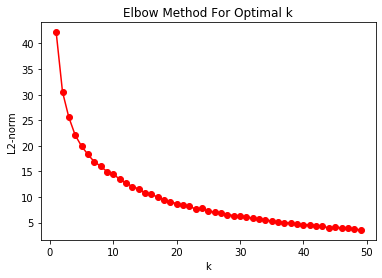

3.5668463040277

In [22]:
import matplotlib.pyplot as plt
def elbow(norm):
    plt.plot(K,norm, 'ro-')
    plt.xlabel('k')
    plt.ylabel('L2-norm')
    plt.title('Elbow Method For Optimal k')
    return plt.show()
elbow_curve=elbow(SSD)
elbow_curve
np.min(np.array(SSD))

In [23]:
elbow_N051=np.empty([49,2])
elbow_N051=pd.DataFrame(elbow_N051,columns=['K','SSD'])
elbow_N051['K']=K
elbow_N051['SSD']=SSD
elbow_N051.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/elbow_N051.xlsx')

Cluster Neighborhoods. Run k-means to cluster the neighborhood into 5 clusters.

In [24]:
# set number of clusters
kclusters = 3

In [25]:

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_neig_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_labels=kmeans.labels_
kmeans_labels


array([0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2,
       0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0,
       0, 1, 2, 2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 1,
       2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2,
       0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2,
       2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1,
       0, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 0], dtype=int32)

In [26]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
s_score=metrics.silhouette_score(London_neig_grouped_clustering,kmeans_labels, metric='euclidean')
s_score=pd.Series(s_score,index=[kclusters])

In [27]:
pp=pd.DataFrame(kmeans.labels_,columns=['Cluster Labels'])
kclusters_N031=pp['Cluster Labels'].value_counts().sort_index()
kclusters_N031=kclusters_N031.append(s_score)

Identify each neighbourhood with its Cluster Labels

In [28]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_neig_merged =pd.merge(neighbourhoods,neighbourhoods_venues_sorted, on='Neighbourhood').sort_values('Cluster Labels')

London_neig_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,Chadwell Heath,51.575700,0.144000,0,parks_outdoors,shops,nightlife,travel,food
184,Havering,Collier Row,51.593100,0.173600,0,shops,parks_outdoors,travel,nightlife,food
77,Bromley,Cudham,51.316366,0.074833,0,nightlife,arts_entertainment,travel,shops,parks_outdoors
75,Bromley,Crystal Palace,51.420300,-0.070500,0,parks_outdoors,travel,food,shops,arts_entertainment
186,Havering,Ardleigh Green,51.583300,0.216500,0,nightlife,shops,building,travel,parks_outdoors


Finally, let's visualize the resulting clusters

In [30]:
address = 'London,UK'

geolocator = Nominatim(user_agent="to_explorer",timeout=70)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

import random

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters

colors=get_colors(kclusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_neig_merged['Latitude'], London_neig_merged['Longitude'],
                                  London_neig_merged['Neighbourhood'], London_neig_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[cluster-1],
        fill=True,
        #fill_colors=colors[cluster-1],
        fill_colors='white',
        fill_opacity=0.1).add_to(map_clusters)
       
map_clusters


GeocoderUnavailable: Service not available

In [ ]:
map_clusters.save("/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/map_London_borough_neig_clusters_CATEGORY03-1.html")

Examine Clusters. Now, I can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, I will assign a name to each cluster.

In [ ]:
    print ('CLuster 1: ')

 

In [31]:
 London_neig_merged.loc[London_neig_merged['Cluster Labels']==0,:]
    
 

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Barking and Dagenham,Chadwell Heath,51.575700,0.144000,0,parks_outdoors,shops,nightlife,travel,food
184,Havering,Collier Row,51.593100,0.173600,0,shops,parks_outdoors,travel,nightlife,food
77,Bromley,Cudham,51.316366,0.074833,0,nightlife,arts_entertainment,travel,shops,parks_outdoors
75,Bromley,Crystal Palace,51.420300,-0.070500,0,parks_outdoors,travel,food,shops,arts_entertainment
186,Havering,Ardleigh Green,51.583300,0.216500,0,nightlife,shops,building,travel,parks_outdoors
...,...,...,...,...,...,...,...,...,...,...
36,Bexley,Blackfen,51.450800,0.092550,0,shops,travel,parks_outdoors,nightlife,food
1,Redbridge,Chadwell Heath,51.575700,0.144000,0,parks_outdoors,shops,nightlife,travel,food
38,Bexley,Upton,51.452457,0.127571,0,shops,parks_outdoors,food,arts_entertainment,travel
35,Bexley,Bexleyheath (also Bexley New Town),51.463485,0.148055,0,nightlife,shops,building,travel,parks_outdoors


In [32]:
 print ('CLuster 2: ')

CLuster 2: 


In [33]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==1,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
154,Hackney,Haggerston,51.534630,-0.076630,1,food,nightlife,shops,parks_outdoors,arts_entertainment
274,Wandsworth,Southfields,51.446000,-0.195000,1,nightlife,food,shops,parks_outdoors,building
169,Harrow,South Harrow,51.564000,-0.352410,1,food,shops,parks_outdoors,nightlife,travel
168,Harrow,Pinner,51.593200,-0.389400,1,food,shops,nightlife,parks_outdoors,building
151,Hackney,Homerton,51.552120,-0.047040,1,food,shops,nightlife,arts_entertainment,parks_outdoors
...,...,...,...,...,...,...,...,...,...,...
99,Bromley,Beckenham,51.408000,-0.022000,1,food,nightlife,shops,travel,parks_outdoors
117,Enfield,Freezywater,51.678300,-0.031000,1,food,shops,travel,parks_outdoors,nightlife
128,Greenwich,Woolwich,51.488000,0.063000,1,food,shops,nightlife,travel,parks_outdoors
102,Bromley,"Sydenham (also Lower Sydenham, Upper Sydenham)",51.402805,0.014814,1,food,shops,nightlife,building,arts_entertainment


In [34]:
print ('Cluster 3: ')

Cluster 3: 


In [35]:
London_neig_merged.loc[London_neig_merged['Cluster Labels']==2,:]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
269,Wandsworth,Nine Elms,51.4800,-0.1400,2,food,shops,nightlife,travel,building
33,Bexley,Belvedere,51.4856,0.1541,2,shops,event,travel,parks_outdoors,nightlife
40,Brent,Wembley,51.5528,-0.2979,2,food,shops,nightlife,building,travel
32,Bexley,Thamesmead,51.5040,0.1261,2,shops,nightlife,food,event,arts_entertainment
273,Wandsworth,Wandsworth,51.4550,-0.1920,2,shops,food,nightlife,travel,parks_outdoors
...,...,...,...,...,...,...,...,...,...,...
74,Bromley,St Paul's Cray,51.3998,0.1067,2,shops,food,travel,parks_outdoors,nightlife
81,Bromley,St Mary Cray,51.3920,0.1080,2,shops,food,travel,parks_outdoors,nightlife
182,Havering,South Hornchurch,51.5300,0.1850,2,shops,food,travel,parks_outdoors,nightlife
67,Bromley,Bickley,51.4003,0.0466,2,shops,travel,food,arts_entertainment,parks_outdoors


In [36]:
x=[]
y=[]
for ii in range(kclusters):
    x.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Latitude'].mean())
    y.append(London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Longitude'].mean())
Centroids_N031=np.empty([kclusters,2])                                         
Centroids_N031=pd.DataFrame(Centroids_N031, columns=['x-Latitude','y-Longitude']) 
Centroids_N031['x-Latitude']=x
Centroids_N031['y-Longitude']=y
Centroids_N031.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Centroids_N031.xlsx')

In [37]:
Centroids_N031

,x-Latitude,y-Longitude
0,51.489027,-0.009018
1,51.516148,-0.116151
2,51.477076,-0.023551


In [38]:
features=London_neig_grouped_clustering.columns.tolist()
# clustering purity 
score=pd.DataFrame(index=features,columns=range(kclusters))

for ii in range(kclusters):
           pp=London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:].\
                        groupby("1st Most Common Venue").count()['Neighbourhood']
           for nn in range(len(features)):
                try: 
                    score.loc[features[nn],ii]=pp.loc[features[nn]]
                except:
                    score.loc[features[nn],ii]=0
score

,0,1,2
arts_entertainment,1,0,1
building,1,0,0
education,0,0,0
event,0,0,0
food,1,134,4
nightlife,9,2,0
parks_outdoors,17,1,0
shops,15,0,63
travel,18,1,8


In [39]:
p_score=score.max().sum()/score.sum().sum()
p_score=pd.Series(p_score,index=[kclusters+1])
kclusters_N031=kclusters_N031.append(p_score)

In [40]:
kclusters_N031.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Kclusters_N031.xlsx')
kclusters_N031

0     56.000000
1    118.000000
2     72.000000
3      0.259599
4      0.778986
dtype: float64

In [41]:
neig_list=[]
for ii in range(kclusters):
        neig=London_neig_merged.loc[London_neig_merged['Cluster Labels']==ii,:]['Neighbourhood'].values
        neig_list.append(pd.DataFrame({ii:neig}))
Nclusters_N031=pd.concat([neig_list[0],neig_list[1],neig_list[2]],axis=1)        
Nclusters_N031.to_excel('/home/sedna/Downloads/PROJECT-COURSERA-CAPSTONE/RESULTS/Nclusters_N031.xlsx')

In [42]:
Nclusters_N031

,0,1,2
0,Chadwell Heath,Haggerston,Nine Elms
1,Collier Row,Southfields,Belvedere
2,Cudham,South Harrow,Wembley
3,Crystal Palace,Pinner,Thamesmead
4,Ardleigh Green,Homerton,Wandsworth
...,...,...,...
133,NaN,Beckenham,NaN
134,NaN,Freezywater,NaN
135,NaN,Woolwich,NaN
136,NaN,"Sydenham (also Lower Sydenham, Upper Sydenham)",NaN
